#Import Packages

In [ ]:
import os
import random
import numpy as np
seed = 40
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
import pandas as pd
import requests
import zipfile
from io import BytesIO
!pip install combat
!pip install combat --upgrade
!pip install inmoose
from inmoose.pycombat import pycombat_norm, pycombat_seq
from combat.pycombat import pycombat
from sklearn.model_selection import train_test_split
!pip install conorm
import conorm as conorm
from sklearn.preprocessing import LabelEncoder
from conorm import tmm_norm_factors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
!pip install rnanorm
!pip install mrmr_selection
from mrmr import mrmr_classif
!pip install imbalanced-learn
from rnanorm import TMM
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
import time
from sklearn.feature_selection import RFE
!pip install matplotlib-venn matplotlib
from matplotlib_venn import venn2_unweighted
from sklearn.model_selection import StratifiedKFold

  Preparing metadata (setup.py) ... done
  Created wheel for combat: filename=combat-0.3.3-py3-none-any.whl size=36782 sha256=8fe8ec22f856d572effee8ff8ce13597f1b2fd6836fdd70ee919e16e9b12fa73
  Stored in directory: /root/.cache/pip/wheels/0d/e4/46/5c7b89d38f5160cf8f2fdda0a52c93439b6e7d9d661e8336f4
Successfully built combat
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 73.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.5 MB/s eta 0:00:00
  Created wheel for inmoose: filename=inmoose-0.7.3-cp310-cp310-linux_x86_64.whl size=5074081 sha256=979f8fbfefc2500bacd5d4c26fa0ad519ee96eb99f5e8e29f4af45b49ded775f
  Stored in dir

#Load Data

In [ ]:
sample_url = "https://raw.githubusercontent.com/MyronBest/InTVeld_Pancancer_TSOO/main/TableS2.csv"

sampleinfo = pd.read_csv(sample_url)
sampleinfo.drop('Unnamed: 0', axis=1, inplace=True)

sampleinfo=sampleinfo[(sampleinfo['Group']=='Ovarian cancer')|(sampleinfo['Group']=='Asymptomatic controls')]

sampleinfo=sampleinfo.loc[sampleinfo['Sex']=='F']

sampleinfo = sampleinfo[~((sampleinfo['Group'] == 'Ovarian cancer') & (sampleinfo['Stage'] == 'n.a.'))]

sampleinfo['Stage']=sampleinfo['Stage'].replace(to_replace='n.a.',value='Control')


In [ ]:
order = ["Institute 1", "Institute 2", "Institute 3", "Institute 4", "Institute 5",
                "Institute 10", "Institute 12", "Institute 13"]

sampleinfo = sampleinfo.sort_values(by="Sample.supplying.institution").reset_index(drop=True)

Samples=sampleinfo['Sample.ID'].tolist()

In [ ]:
base_url = "https://github.com/Shaimaa264/ML-project/raw/main/data/"

counts_zip_url = f"{base_url}OriginalCounts.zip"
response = requests.get(counts_zip_url)
with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('extracted')

counts_file_path = 'extracted/Counts/TEP_Control_Count.csv'
counts = pd.read_csv(counts_file_path, index_col=0)

print("Counts DataFrame:")
print(counts.head())

genes_url = f"{base_url}genes.csv"
genes = pd.read_csv(genes_url, index_col=0)

print("\nGenes DataFrame:")
print(genes.head())

Counts DataFrame:
                 1-Vumc-HD-101-TR922  2-Vumc-HD-103-TR923  \
ENSG00000000419                    5                   79   
ENSG00000000460                    8                   10   
ENSG00000000938                   24                  336   
ENSG00000001036                   38                   46   
ENSG00000001461                   72                   17   

                 3-Vumc-HD-108-TR924  4-Vumc-HD-127-TR925  \
ENSG00000000419                   58                  128   
ENSG00000000460                   21                   14   
ENSG00000000938                  334                   59   
ENSG00000001036                   15                   36   
ENSG00000001461                   11                    9   

                 5-Vumc-HD-130-TR926  6-Vumc-HD-142-TR927  \
ENSG00000000419                   93                   12   
ENSG00000000460                    6                    8   
ENSG00000000938                  120                   22   
ENSG

In [ ]:

counts.columns = counts.columns.str.replace(r'^.*?-', '', regex=True)
counts=counts[Samples]
print(counts.shape)
print(counts.columns==Samples)
counts = counts[Samples]

(5440, 355)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  T

In [ ]:
genes=pd.read_csv('https://github.com/Shaimaa264/ML-project/raw/refs/heads/main/data/genes.csv')
genes.drop('Unnamed: 0', axis=1, inplace=True)
print(genes.head())
y_genes=genes[genes['chromosome_name']=='Y']
y_genes=y_genes['ensembl_gene_id'].tolist()
print(len(y_genes))
genes_in_counts=counts.index.tolist()
matching_y = list(set(y_genes).intersection(genes_in_counts))
counts=counts.drop(matching_y)
genes.set_index(genes['ensembl_gene_id'], inplace=False)
counts = counts[counts.sum(axis=1) >= 50]
genes_in_counts=counts.index.tolist()
mask = genes['ensembl_gene_id'].isin(genes_in_counts)
genes_in_counts=genes[mask]

   ensembl_gene_id hgnc_symbol  \
0  ENSG00000000003      TSPAN6   
1  ENSG00000000005        TNMD   
2  ENSG00000000419        DPM1   
3  ENSG00000000457       SCYL3   
4  ENSG00000000460    C1orf112   

                                         description chromosome_name    band  \
0       tetraspanin 6 [Source:HGNC Symbol;Acc:11858]               X   q22.1   
1         tenomodulin [Source:HGNC Symbol;Acc:17757]               X   q22.1   
2  dolichyl-phosphate mannosyltransferase polypep...              20  q13.13   
3  SCY1-like 3 (S. cerevisiae) [Source:HGNC Symbo...               1   q24.2   
4  chromosome 1 open reading frame 112 [Source:HG...               1   q24.2   

   strand  start_position  end_position  coding_gene_size  
0      -1        99883667      99894988              2968  
1       1        99839799      99854882              1610  
2      -1        49551404      49575092              1207  
3      -1       169818772     169863408              6876  
4       1     

#RLE before

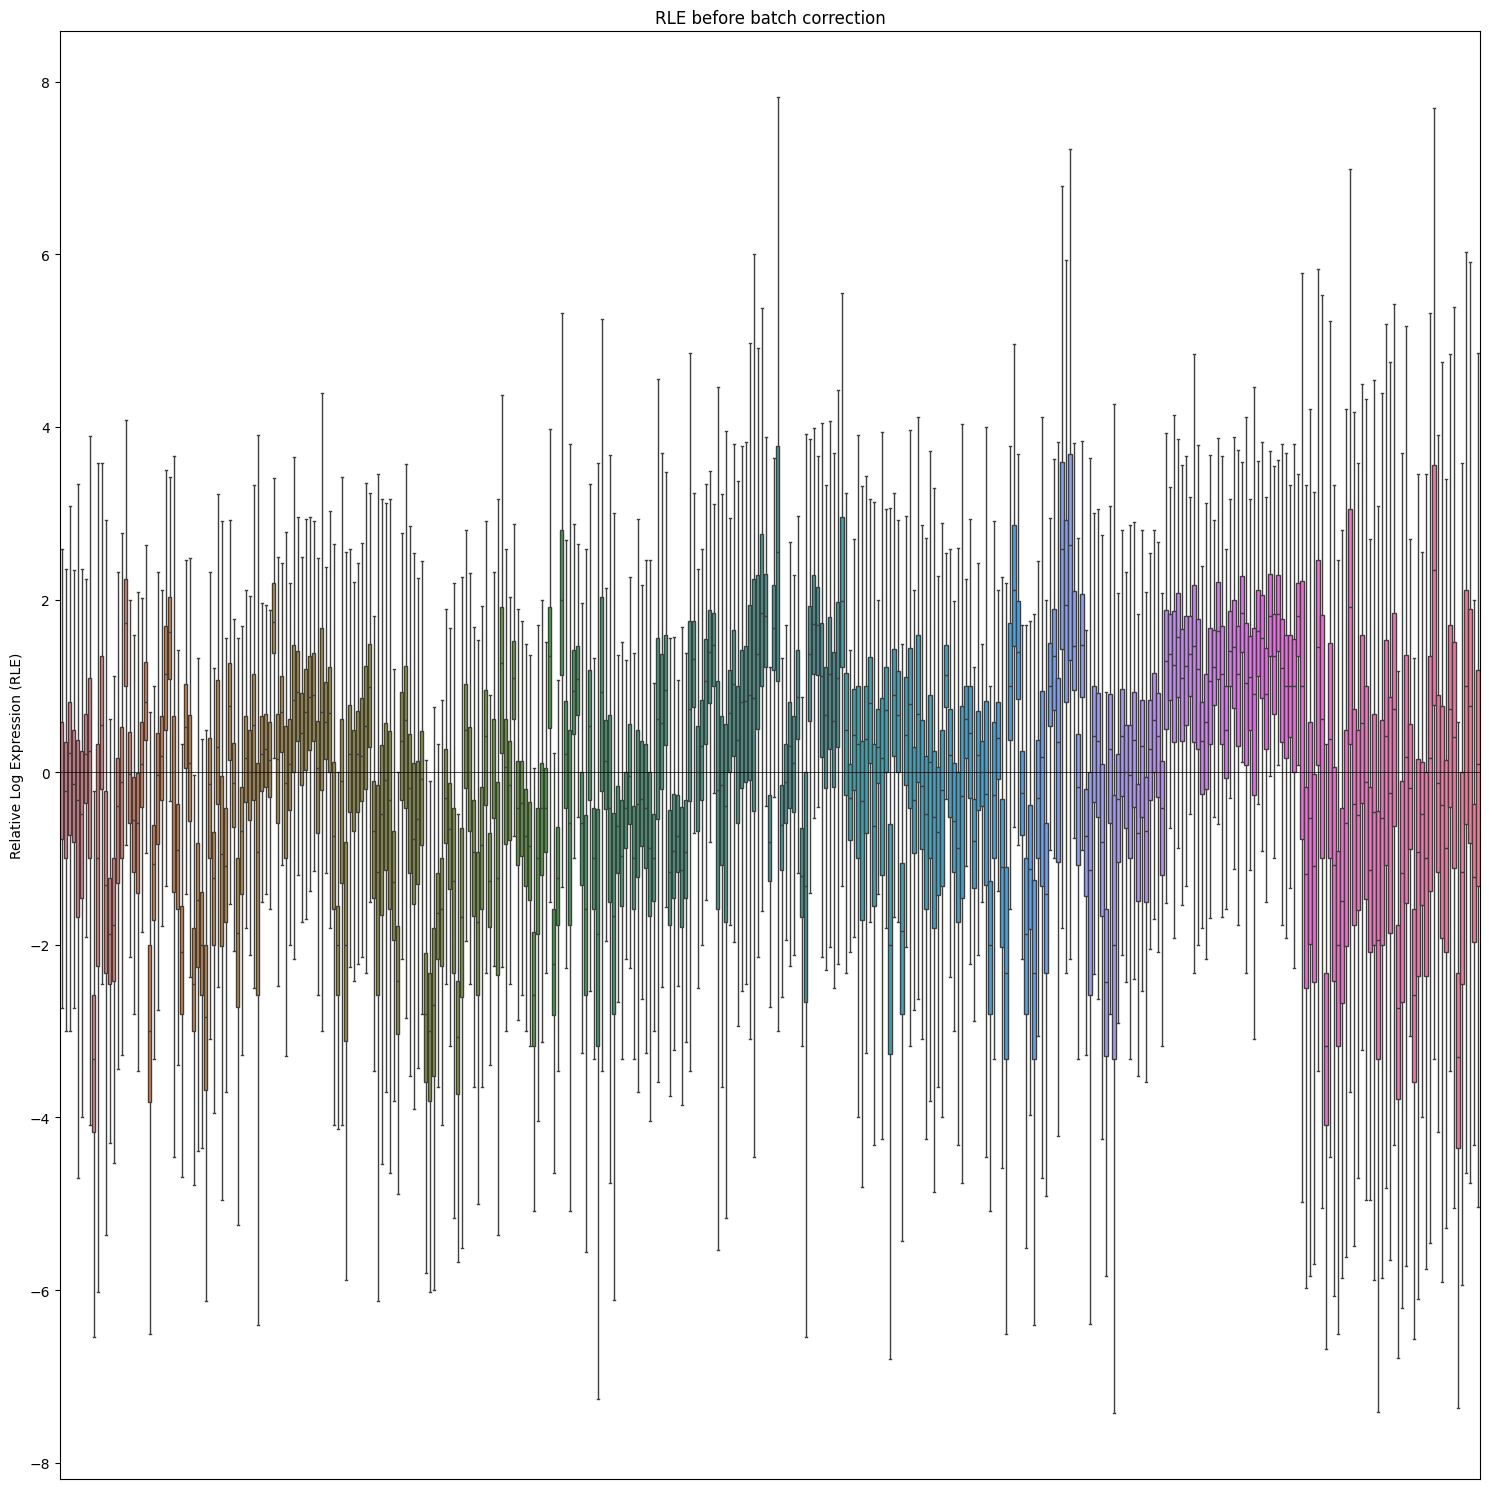

In [ ]:
RLE=counts.copy()
medians=RLE.median(axis=1)
RLE=np.log2(RLE + 1).sub(np.log2(medians + 1), axis=0)
plt.figure(figsize=(15,15))
sns.boxplot(data=RLE, showfliers=False)
plt.ylabel("Relative Log Expression (RLE)")
plt.title("RLE before batch correction")
plt.xticks([])
plt.gca().xaxis.set_ticks_position('none')
plt.tight_layout()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.show()

#Batch Effect Correction


In [ ]:
corrected = pycombat_seq(counts, sampleinfo['Sample.supplying.institution'])
corrected=pd.DataFrame(corrected, columns=Samples, index=genes_in_counts['ensembl_gene_id'])
corrected=corrected.transpose()


In [ ]:

tmm = TMM().fit(corrected)
tmm.get_norm_factors(corrected)
norm=tmm.transform(corrected)
norm=pd.DataFrame(data=norm, columns=genes_in_counts['ensembl_gene_id'])
Encoder=LabelEncoder()
norm.insert(5434, 'Stage', value=sampleinfo['Stage'])
norm['Stage']=Encoder.fit_transform(norm['Stage'])

#RLE after batch correction

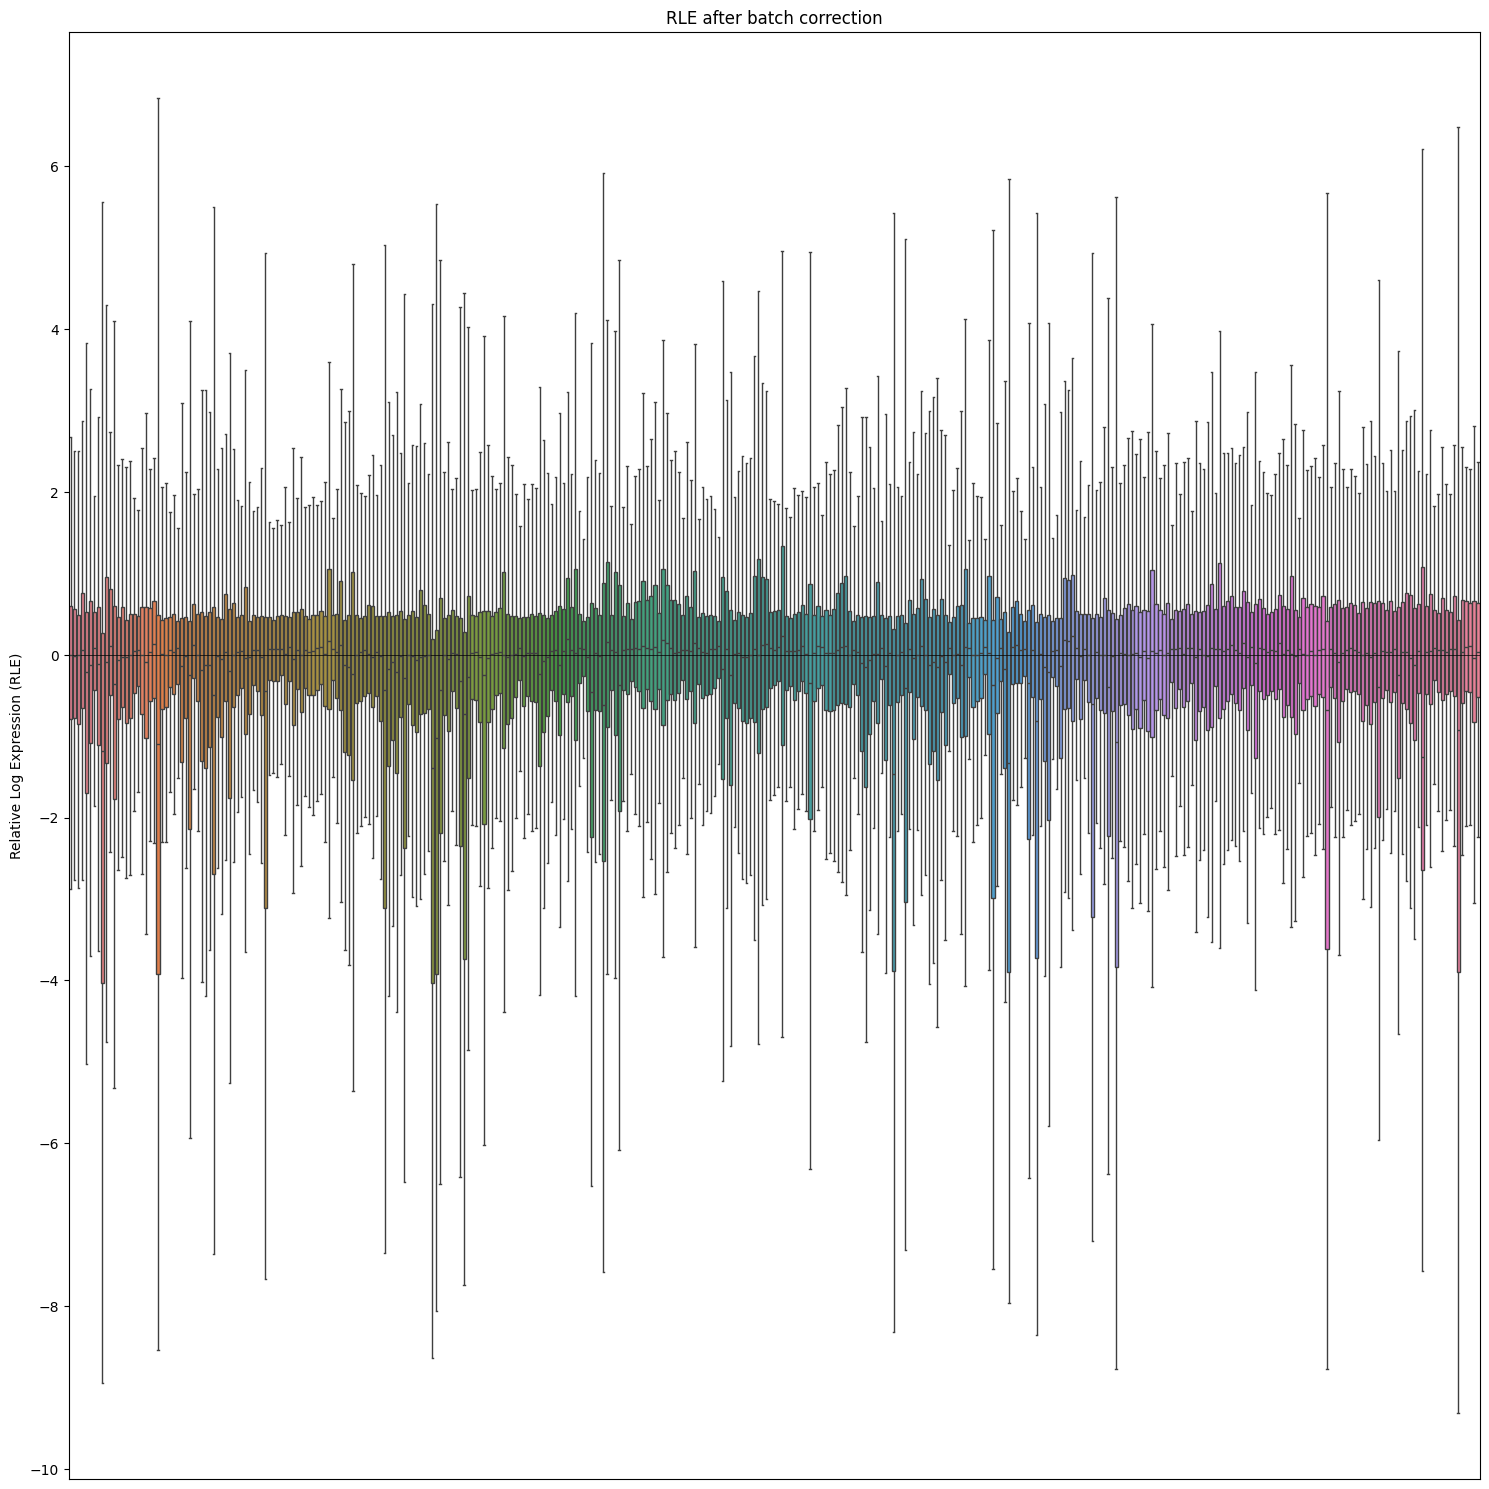

In [ ]:
RLE=norm.iloc[:, :-1].transpose()
medians=RLE.median(axis=1)
RLE=np.log2(RLE + 1).sub(np.log2(medians + 1), axis=0)
plt.figure(figsize=(15,15))
sns.boxplot(data=RLE, showfliers=False)
plt.ylabel("Relative Log Expression (RLE)")
plt.title("RLE after batch correction")
plt.xticks([])
plt.gca().xaxis.set_ticks_position('none')
plt.tight_layout()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.show()

#Apply variance threshold#

In [ ]:
#Remove highly correlated features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selector.fit_transform(norm.iloc[:,:-1])
selector.get_support()
var_selected=list(selector.get_feature_names_out())
var_selected=norm.loc[:,var_selected]
var_selected.set_index(sampleinfo['Sample.ID'],inplace=True)

#Split and tranform Labels#

In [ ]:
StageIII_samples=sampleinfo.copy()
StageIII_samples['Stage'] = StageIII_samples['Stage'].replace(['I', 'II', 'IV'], 'rest')
StageIII_samples=StageIII_samples[StageIII_samples['Stage'] != 'rest']
StageIII_IDs=StageIII_samples['Sample.ID'].tolist()
StageIII_samples['Stage']=Encoder.fit_transform(StageIII_samples['Stage'])
y=StageIII_samples['Stage'].to_numpy()
X=var_selected.loc[StageIII_IDs].to_numpy()

#Stage 3 versus control#

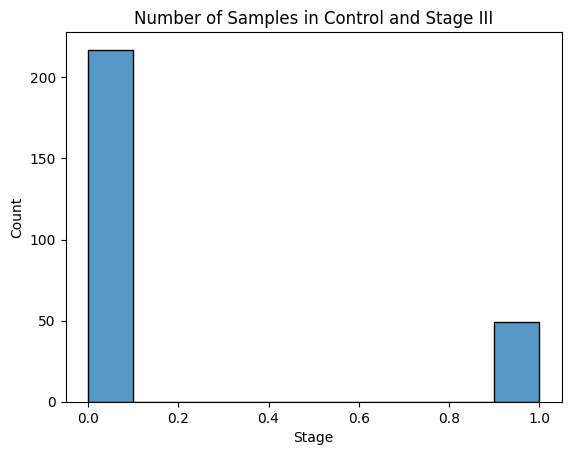

In [ ]:
sns.histplot(StageIII_samples['Stage'])
plt.title('Number of Samples in Control and Stage III')
plt.show()

In [ ]:
print(X.shape)
classes, counts = np.unique(y, return_counts=True)
print(f"classes: {classes}")
print(f"Counts: {counts}")

(266, 5434)
classes: [0 1]
Counts: [217  49]


#Apply SMOTE

In [ ]:
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

In [ ]:
print(X_res.shape)
classes, counts = np.unique(y_res, return_counts=True)
print(f"classes: {classes}")
print(f"Counts: {counts}")

(434, 5434)
classes: [0 1]
Counts: [217 217]


#MRMR#

In [ ]:
training_data=pd.DataFrame(data=X_train, columns=genes_in_counts['ensembl_gene_id'])
training_data = training_data.reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)

In [ ]:
mrmrselected = mrmr_classif(X=training_data, y=pd.Series(y_train),
                            K=1000)

100%|██████████| 1000/1000 [23:44<00:00,  1.42s/it]


In [ ]:
mrmr_features=mrmrselected.copy()

In [ ]:
X=var_selected.loc[StageIII_IDs, mrmr_features].to_numpy()
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

#SelectFromModel-RF

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

RF = RandomForestClassifier(random_state=40)

grid_search = GridSearchCV(RF, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

RandomForestClassifier(n_estimators=200, random_state=40)


In [ ]:
RF=RandomForestClassifier(n_estimators=200, random_state=40)
RF.fit(X_train, y_train)
sfm = SelectFromModel(RF, prefit=True, max_features=250)
RF_selected=sfm.get_support(indices=True)
RF_selected=[mrmr_features[i] for i in RF_selected]
print(len(RF_selected))

250


#SelectFromModel-SVM

In [ ]:
X=var_selected.loc[StageIII_IDs, mrmr_features].to_numpy()
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(random_state=40), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LinearSVC(C=0.01, random_state=40)

In [ ]:
SVC=LinearSVC(C=0.01, class_weight='balanced', random_state=40)
SVC.fit(X_train, y_train)
sfm = SelectFromModel(SVC, prefit=True, max_features=250)
sfm_selected=sfm.get_support(indices=True)
sfm_selected=[mrmr_features[i] for i in sfm_selected]
print(len(sfm_selected))

250


In [ ]:
common_model= list(set(sfm_selected).intersection(RF_selected))
print("Common items:", len(common_model))

Common items: 85


#SFS on common model

In [ ]:
X=var_selected.loc[StageIII_IDs, common_model].to_numpy()
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(random_state=40), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LinearSVC(C=0.01, random_state=40)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
import numpy as np
import time
start_time = time.time()
SVC = LinearSVC(C=0.01, class_weight='balanced', random_state=40)
SFS=SequentialFeatureSelector(SVC,
    direction='forward', scoring='accuracy', cv=5)
SFS.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
print(execution_time)
sfs_selected=list(SFS.get_support(indices=True))
sfs_selected=[common_model[i] for i in sfs_selected]

83.01582956314087


In [ ]:
print(len(sfs_selected))

42


#RFE-SVM on common model

In [ ]:
X=var_selected.loc[StageIII_IDs, common_model].to_numpy()
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2,
                                                    random_state=40, stratify=y_res)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(random_state=40), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LinearSVC(C=0.01, random_state=40)

79.07853078842163
33


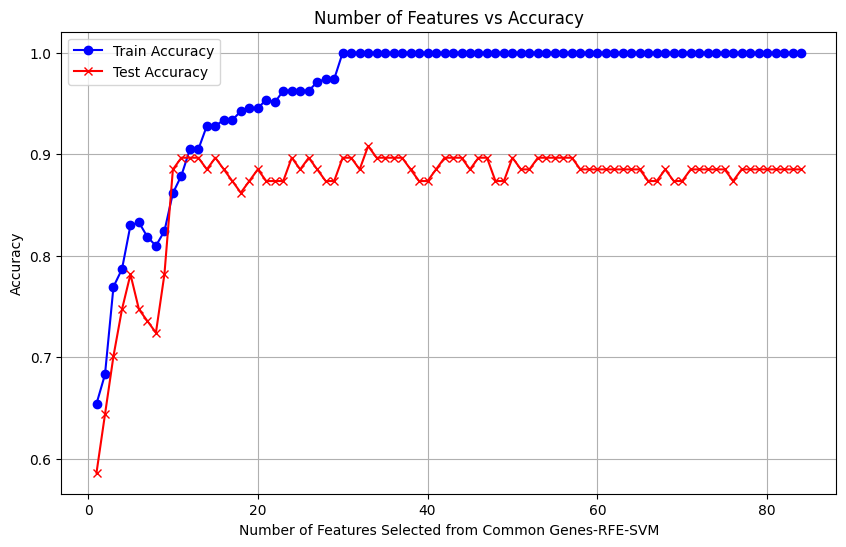

In [ ]:
start_time = time.time()

SVC = LinearSVC(C=0.01, class_weight='balanced', random_state=40)
num_features = []
train_accuracies = []
test_accuracies = []
for n_features in range(1, 85):
    selector = RFE(SVC, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)
    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    num_features.append(n_features)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

end_time = time.time()
execution_time = end_time - start_time
print(execution_time)

max_test_index = np.argmax(test_accuracies)
max_test_accuracy = test_accuracies[max_test_index]
best_num_features = num_features[max_test_index]
print(best_num_features)


plt.figure(figsize=(10, 6))
plt.plot(num_features, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(num_features, test_accuracies, label='Test Accuracy', color='red', marker='x')

plt.xlabel('Number of Features Selected from Common Genes-RFE-SVM')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
SVC=LinearSVC(C=0.01, class_weight='balanced', random_state=40)
selector = RFE(SVC, n_features_to_select=33)
selector = selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
score=selector.score(X_test, y_test)
rfe_selected=list(np.where(selector.support_ == 1)[0])
rfe_selected = [common_model[i] for i in rfe_selected]
print(accuracy_score(y_train, selector.predict(X_train)))
print(accuracy_score(y_test, selector.predict(X_test)))

1.0
0.9080459770114943


#Venn Diagrm

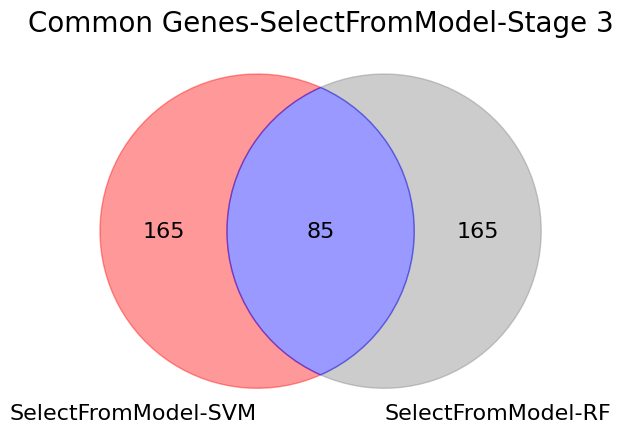

In [ ]:
sfm_selected=set(sfm_selected)
RF_selected=set(RF_selected)

venn = venn2_unweighted([sfm_selected, RF_selected], ('SelectFromModel-SVM', 'SelectFromModel-RF'))
venn.get_patch_by_id('10').set_color('red')
venn.get_patch_by_id('01').set_color('grey')
venn.get_patch_by_id('11').set_color('blue')

for text in venn.set_labels:
    if text:
        text.set_fontsize(16)

for text in venn.subset_labels:
    if text:
        text.set_fontsize(16)

plt.title("Common Genes-SelectFromModel-Stage 3", fontsize=20, weight='light')
plt.tight_layout()
plt.show()

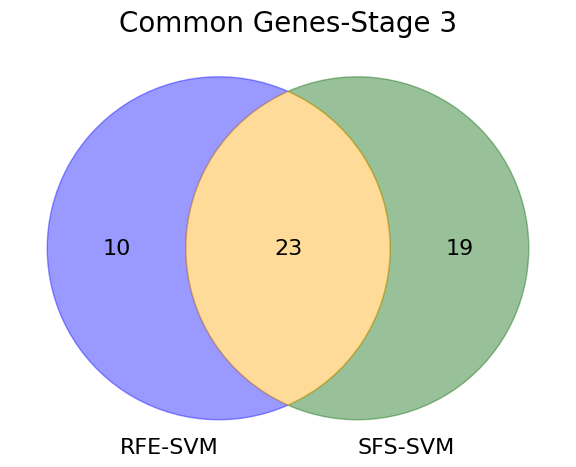

In [ ]:
sfs_selected=set(sfs_selected)
rfe_selected=set(rfe_selected)
venn = venn2_unweighted([rfe_selected, sfs_selected], ('RFE-SVM', 'SFS-SVM'))
venn.get_patch_by_id('10').set_color('blue')
venn.get_patch_by_id('01').set_color('darkgreen')
venn.get_patch_by_id('11').set_color('orange')

for text in venn.set_labels:
    if text:
        text.set_fontsize(16)

for text in venn.subset_labels:
    if text:
        text.set_fontsize(16)

plt.title("Common Genes-Stage 3", fontsize=20, weight='light')
plt.tight_layout()
plt.show()

In [ ]:
common_sfs_rfe = list(set(rfe_selected).intersection(sfs_selected))
print("Common items between RFE-SVM and SFS-SVM:", len(common_sfs_rfe))


Common items between RFE-SVM and SFS-SVM: 23


In [ ]:
StageIII_samples=sampleinfo.copy()
StageIII_samples['Stage'] = StageIII_samples['Stage'].replace(['I', 'II', 'IV'], 'rest')
StageIII_samples=StageIII_samples[StageIII_samples['Stage'] != 'rest']
StageIII_IDs=StageIII_samples['Sample.ID'].tolist()
StageIII_samples['Stage']=Encoder.fit_transform(StageIII_samples['Stage'])
y=StageIII_samples['Stage'].to_numpy()
X=var_selected.loc[StageIII_IDs].to_numpy()

In [ ]:
X=var_selected.loc[StageIII_IDs, common_sfs_rfe].to_numpy()
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2,
                                                    random_state=40, stratify=y_res)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

RF = RandomForestClassifier(random_state=40)

grid_search = GridSearchCV(RF, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

RandomForestClassifier(n_estimators=200, random_state=40)


In [ ]:
RF=RandomForestClassifier(n_estimators=200, random_state=40)
RF.fit(X_train, y_train)
print(accuracy_score(y_train, RF.predict(X_train)))
print(accuracy_score(y_test, RF.predict(X_test)))

1.0
0.9770114942528736


In [ ]:
y_test_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98

Confusion Matrix:
[[43  1]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.98      0.98      0.98        43

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



Train Accuracy: 1.0
Test Accuracy: 0.9770114942528736


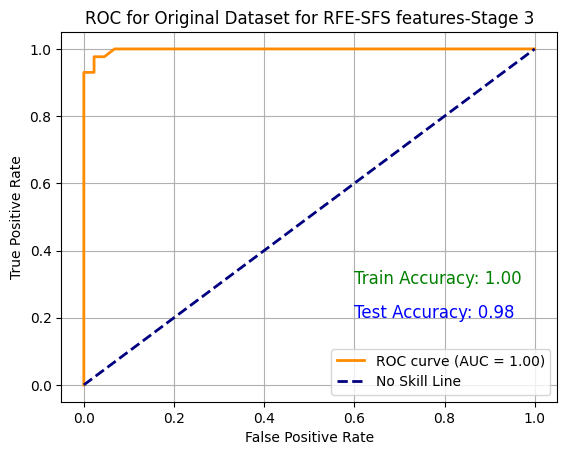

In [ ]:
train_accuracy = accuracy_score(y_train, RF.predict(X_train))
test_accuracy = accuracy_score(y_test, RF.predict(X_test))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

y_test_proba = RF.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Original Dataset for RFE-SFS features-Stage 3')
plt.text(0.6, 0.3, f'Train Accuracy: {train_accuracy:.2f}', fontsize=12, color='green')
plt.text(0.6, 0.2, f'Test Accuracy: {test_accuracy:.2f}', fontsize=12, color='blue')

plt.legend(loc="lower right")
plt.grid()
plt.show()

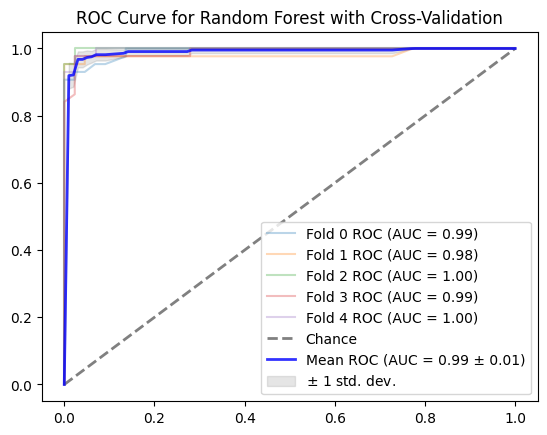

In [ ]:
RF = RandomForestClassifier(n_estimators=200, random_state=40)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

for i, (train_idx, test_idx) in enumerate(cv.split(X_res, y_res)):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    RF.fit(X_train, y_train)

    y_test_proba = RF.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

    ax.plot(fpr, tpr, alpha=0.3, label=f"Fold {i} ROC (AUC = {roc_auc:.2f})")

ax.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance", lw=2)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f ± %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="gray",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="ROC Curve for Random Forest with Cross-Validation",
)
ax.legend(loc="lower right")
plt.show()

#External Validation

In [ ]:

validation_counts_file_path = 'https://github.com/Shaimaa264/ML-project/raw/main/data/external_validation_counts.csv'
validation_counts = pd.read_csv(validation_counts_file_path, index_col=0)

print(validation_counts.head())

                 TR1125  TR1140  TR1159  TR1104  TR1141  TR1143  TR1142  \
ENSG00000000003       0       0       0       0       0       0       0   
ENSG00000000419       4       8      23       5      16       8       1   
ENSG00000000457       0       0       5       1       0       0       2   
ENSG00000000460       0      10       3      10       2       2       6   
ENSG00000000938       0      45     108      19      17      28      13   

                 TR1105  TR1158  TR1144  ...  TR4026  TR4023  TR4087  TR4147  \
ENSG00000000003       0       1       4  ...       0       0       0       0   
ENSG00000000419       1      33       9  ...       0       4       4       1   
ENSG00000000457       0       5       0  ...       0       2       2       0   
ENSG00000000460       0      16      16  ...       2       3       0       0   
ENSG00000000938      20      49       0  ...       7      10      60      37   

                 TR4010  TR4086  TR4277  TR4376  TR4210  TR4187  
EN

In [ ]:
validation_samples = pd.read_csv("https://github.com/Shaimaa264/ML-project/raw/main/data/external_validation_samples.tsv", sep='\t')
print(validation_samples.shape)
validation_samples.loc[validation_samples['Description'] == 'Healthy control', 'Stage'] = 'Control'
validation_samples = validation_samples.dropna(subset=['Stage'])
validation_samples = validation_samples[~validation_samples['Stage'].isin(['Relapse', 'Missing'])]
validation_samples = validation_samples[validation_samples['OriginalGroup'] != 'Other']
validation_samples = validation_samples[validation_samples['Gender'] != 4]
print(validation_samples['Stage'].value_counts())
print(validation_samples.shape)
print(validation_samples['Gender'].value_counts())

(273, 10)
Stage
Control    119
IIIC         9
IIB          3
IIIB         3
IA           2
IC           2
IIIA         2
IVB          2
IIA          1
IIC          1
Name: count, dtype: int64
(144, 10)
Gender
2    119
0     25
Name: count, dtype: int64


In [ ]:
validation_samples['Stage'] = validation_samples['Stage'].replace(['IA', 'IB', 'IC'], 'Stage1')
validation_samples['Stage'] = validation_samples['Stage'].replace(['IIA', 'IIB', 'IIC'], 'Stage2')
validation_samples['Stage'] = validation_samples['Stage'].replace(['IIIA', 'IIIB', 'IIIC'], 'Stage3')
validation_samples['Stage'] = validation_samples['Stage'].replace(['IVB'], 'Stage4')
print(validation_samples['Stage'].value_counts())

Stage
Control    119
Stage3      14
Stage2       5
Stage1       4
Stage4       2
Name: count, dtype: int64


In [ ]:
validation_counts = validation_counts[validation_samples.index]
print(validation_samples.index==validation_counts.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [ ]:
validation_IDs=validation_samples['Id'].tolist()
validation_counts=validation_counts[validation_IDs]
#Filter lowly expressed genes
validation_counts = validation_counts[validation_counts.sum(axis=1) >= 50]
print(f"Shape after filtering lowly expressed genes: {validation_counts.shape}")

#Drop y_chromosome genes
validation_counts_genes=validation_counts.index.tolist()
matching_y = list(set(y_genes).intersection(validation_counts_genes))
validation_counts=validation_counts.drop(matching_y)
print(f"Shape after dropping Y chromosome genes: {validation_counts.shape}")

Shape after filtering lowly expressed genes: (9964, 144)
Shape after dropping Y chromosome genes: (9960, 144)


In [ ]:
StageIII_samples=validation_samples.copy()
StageIII_samples['Stage'] = StageIII_samples['Stage'].replace(['Stage1', 'Stage2', 'Stage4'], 'rest')
StageIII_samples=StageIII_samples[StageIII_samples['Stage'] != 'rest']
StageIII_IDs=StageIII_samples['Id'].tolist()
StageIII_samples['Stage']=Encoder.fit_transform(StageIII_samples['Stage'])
y=StageIII_samples['Stage'].to_numpy()
X=validation_counts.loc[common_sfs_rfe]
X=X.loc[:,StageIII_IDs].transpose()

In [ ]:
classes, counts = np.unique(y, return_counts=True)
print(f"classes: {classes}")
print(f"Counts: {counts}")

classes: [0 1]
Counts: [119  14]


In [ ]:
y_pred = RF.predict(X)
print("Precision:",precision_score(y, y_pred))
print("Recall:",recall_score(y, y_pred))
print("F1 score:",f1_score(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

Precision: 0.6428571428571429
Recall: 0.6428571428571429
F1 score: 0.6428571428571429
Accuracy: 0.924812030075188
Confusion Matrix:
 [[114   5]
 [  5   9]]


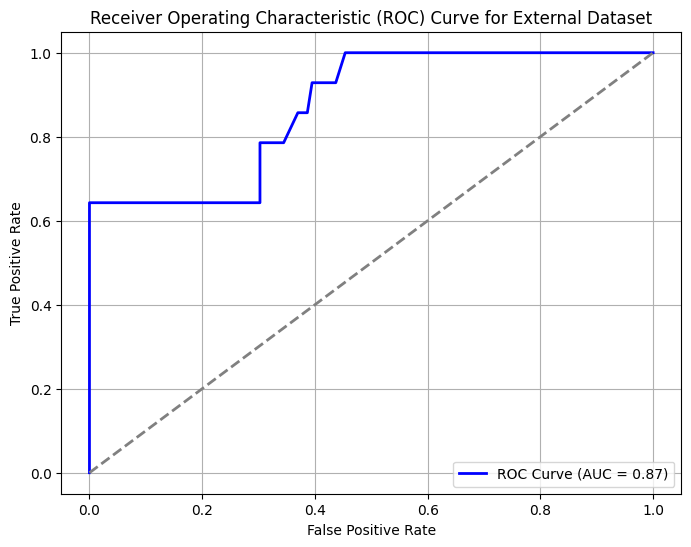

In [ ]:
y_proba = RF.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for External Dataset')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
for i in common_sfs_rfe:
  print(i)

ENSG00000169895
ENSG00000137752
ENSG00000138119
ENSG00000141068
ENSG00000197635
ENSG00000143799
ENSG00000213741
ENSG00000008130
ENSG00000166452
ENSG00000102879
ENSG00000099860
ENSG00000124181
ENSG00000145287
ENSG00000100100
ENSG00000138698
ENSG00000187764
ENSG00000132507
ENSG00000169220
ENSG00000068831
ENSG00000163219
ENSG00000153922
ENSG00000184613
ENSG00000077420


In [ ]:
final_common_S3 = pd.DataFrame(common_sfs_rfe, columns=['EnsemblID'])
final_common_S3.to_csv('final_common_S3.csv', index=False)